In [ ]:
!pip install keras

In [12]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [13]:
import logging
logging.getLogger('tensorflow').disabled = True

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rakeshjami98","key":"92efe00910bb5e7ee1cf113b8c57b4a9"}'}

In [ ]:
!pwd

/content


In [15]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
!pwd

/content


The dogs-vs.-cats dataset can be downloaded from the official Kaggle website.

In [17]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:27<00:00, 33.4MB/s]
100% 812M/812M [00:27<00:00, 30.6MB/s]


The folder we downloaded from Kaggle may be unzipped using the command below.

In [18]:
!unzip -qq dogs-vs-cats.zip

Now with the help of below command we unzip the train folder

In [19]:
!unzip -qq train.zip

Creating a directory called c-vs-d s to store the images into the train, test and validation

In [20]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_s")

def make_subset(subset_name, strt_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(strt_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_image", strt_index=0, end_index=1000)
make_subset("validation_image", strt_index=1000, end_index=1500)
make_subset("test_image", strt_index=1500, end_index=2000)

Train, Test and Validation data

In [21]:
training_data = image_dataset_from_directory(
    new_base_dir / "train_image",
    image_size=(150, 150),
    batch_size=32)
validating_data = image_dataset_from_directory(
    new_base_dir / "validation_image",
    image_size=(150, 150),
    batch_size=32)
testing_data = image_dataset_from_directory(
    new_base_dir / "test_image",
    image_size=(150, 150),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [22]:
for data_batch, labels_batch in training_data:
    print(f"The data batch shape is :{data_batch.shape}")
    print(f"The labels batch shape is :{labels_batch.shape}")
    break
for data_batch, labels_batch in validating_data:
    print(f"The data batch shape is :{data_batch.shape}")
    print(f"The labels batch shape is :{labels_batch.shape}")
    break
for data_batch, labels_batch in testing_data:
    print(f"The data batch shape is :{data_batch.shape}")
    print(f"The labels batch shape is :{labels_batch.shape}")
    break

The data batch shape is :(32, 150, 150, 3)
The labels batch shape is :(32,)
The data batch shape is :(32, 150, 150, 3)
The labels batch shape is :(32,)
The data batch shape is :(32, 150, 150, 3)
The labels batch shape is :(32,)


Buiding the model Structure

In [23]:
inputs = keras.Input(shape=(150, 150, 3))
x_model = layers.Rescaling(1./255)(inputs)
x_model = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.Flatten()(x_model)
x_model = layers.Dropout(0.5)(x_model)
outputs = layers.Dense(1, activation="sigmoid")(x_model)
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

Training the model

In [25]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

In [26]:
callbacks = [
        ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss")
]

In [27]:
history = model.fit(
    training_data,
    epochs=30,
    validation_data = validating_data,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 136s 2s/step - loss: 0.7202 - accuracy: 0.5040 - val_loss: 0.6920 - val_accuracy: 0.5790
Epoch 2/30
63/63 [==============================] - 131s 2s/step - loss: 0.6973 - accuracy: 0.5425 - val_loss: 0.6844 - val_accuracy: 0.6040
Epoch 3/30
63/63 [==============================] - 129s 2s/step - loss: 0.6868 - accuracy: 0.5565 - val_loss: 0.6778 - val_accuracy: 0.5390
Epoch 4/30
63/63 [==============================] - 130s 2s/step - loss: 0.6599 - accuracy: 0.6075 - val_loss: 0.6382 - val_accuracy: 0.6100
Epoch 5/30
63/63 [==============================] - 129s 2s/step - loss: 0.6188 - accuracy: 0.6600 - val_loss: 0.8762 - val_accuracy: 0.5620
Epoch 6/30
63/63 [==============================] - 134s 2s/step - loss: 0.6056 - accuracy: 0.6680 - val_loss: 0.6021 - val_accuracy: 0.6600
Epoch 7/30
63/63 [==============================] - 131s 2s/step - loss: 0.5919 - accuracy: 0.6890 - val_loss: 0.5878 - val_accuracy: 0.6780
Epoch 8/30
63

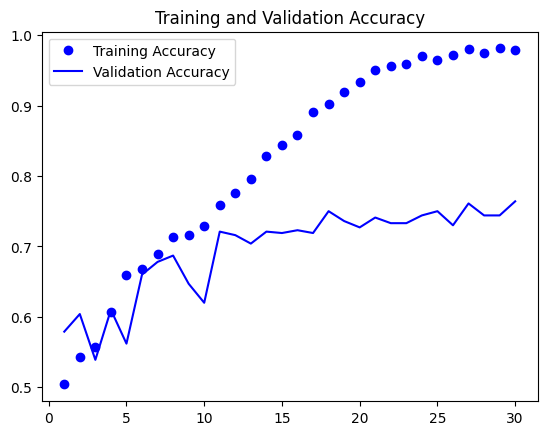

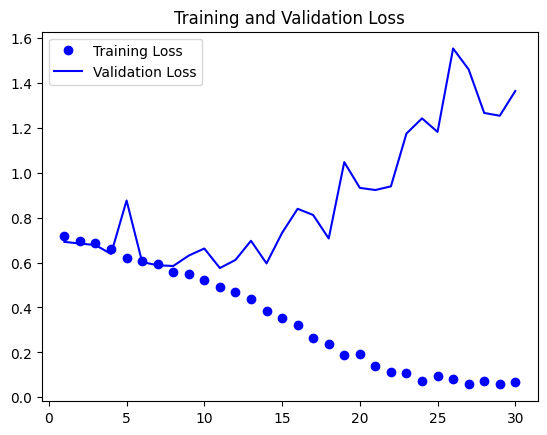

In [28]:
acc = history.history["accuracy"]
val_acc =history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [29]:
test_model = keras.models.load_model("convnet_from_scratch.x")
history_Results = test_model.evaluate(testing_data)
print(f'Loss: {history_Results[0]:.4f}')
print(f'Accuracy: {history_Results[1]:.4f}')

32/32 [==============================] - 17s 505ms/step - loss: 0.6283 - accuracy: 0.6920
Loss: 0.6283
Accuracy: 0.6920


2. Increase the training sample size. Keep the validation and testing samples the same amount as above.

In [30]:
import os, shutil, pathlib
shutil.rmtree("./cats_vs_dogs_s_q2", ignore_errors=True)
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_s_q2")

def make_subset(subset_name, strt_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(strt_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_image", strt_index=0, end_index=1500)
make_subset("validation_image", strt_index=1500, end_index=2000)
make_subset("test_image", strt_index=2000, end_index=2500)

Measures to avoid over fitting

Data Augmentation

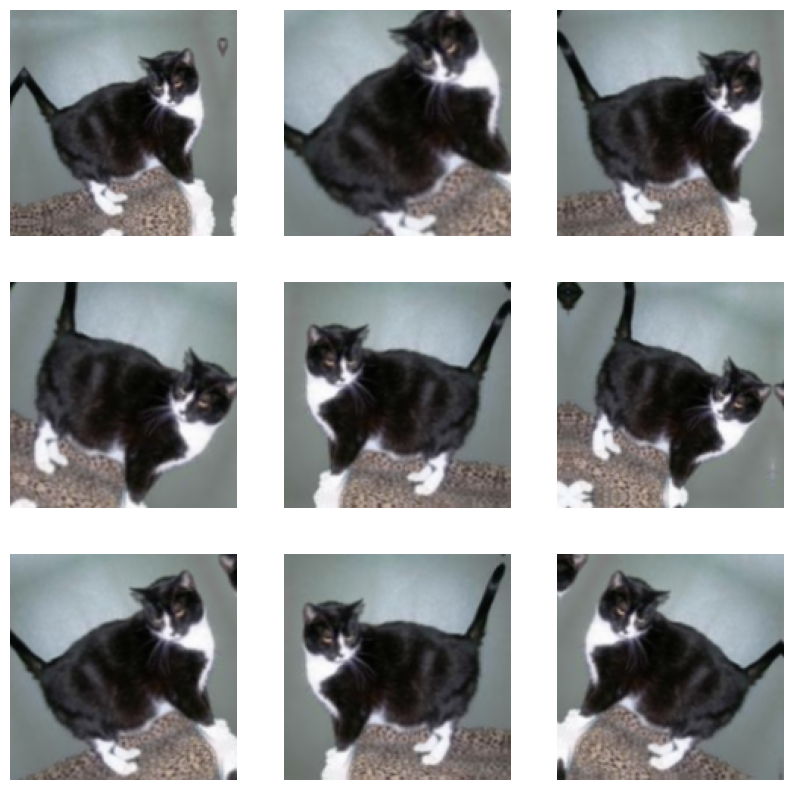

In [31]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in training_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Build the model Structure

In [32]:
inputs = keras.Input(shape=(150, 150, 3))
x_model = layers.Rescaling(1./255)(inputs)
x_model = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.Flatten()(x_model)
x_model = layers.Dropout(0.5)(x_model)
outputs = layers.Dense(1, activation="sigmoid")(x_model)
model = keras.Model(inputs=inputs, outputs=outputs)

In [33]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
        ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.x",
        save_best_only=True,
        monitor="val_loss")
]

history1 = model.fit(
    training_data,
    epochs=50,
    validation_data = validating_data,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 132s 2s/step - loss: 0.6983 - accuracy: 0.5035 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 126s 2s/step - loss: 0.6911 - accuracy: 0.5345 - val_loss: 0.6851 - val_accuracy: 0.5460
Epoch 3/50
63/63 [==============================] - 131s 2s/step - loss: 0.6794 - accuracy: 0.5740 - val_loss: 0.6560 - val_accuracy: 0.5940
Epoch 4/50
63/63 [==============================] - 131s 2s/step - loss: 0.6496 - accuracy: 0.6435 - val_loss: 0.6510 - val_accuracy: 0.6060
Epoch 5/50
63/63 [==============================] - 130s 2s/step - loss: 0.6132 - accuracy: 0.6670 - val_loss: 0.6371 - val_accuracy: 0.6500
Epoch 6/50
63/63 [==============================] - 125s 2s/step - loss: 0.5763 - accuracy: 0.6940 - val_loss: 0.5756 - val_accuracy: 0.6920
Epoch 7/50
63/63 [==============================] - 128s 2s/step - loss: 0.5559 - accuracy: 0.7155 - val_loss: 0.6175 - val_accuracy: 0.6660
Epoch 8/50
63

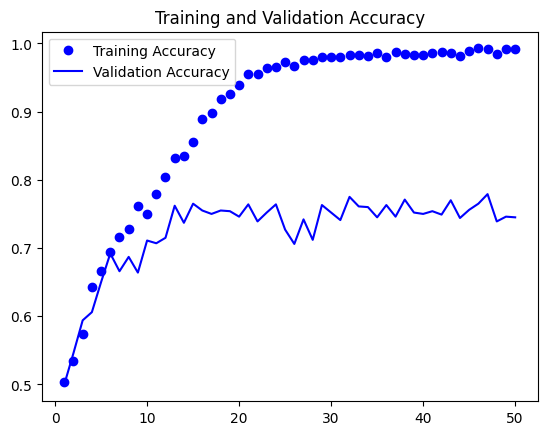

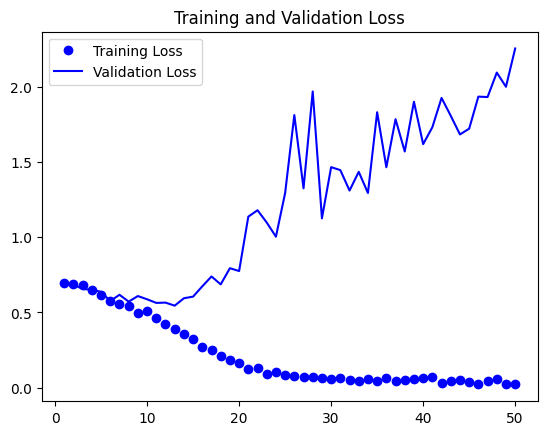

In [34]:
acc = history1.history["accuracy"]
val_acc =history1.history["val_accuracy"]

loss = history1.history["loss"]
val_loss = history1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [35]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.x")
history_Results = test_model.evaluate(testing_data)
print(f'Loss: {history_Results[0]:.4f}')
print(f'Accuracy: {history_Results[1]:.4f}')

32/32 [==============================] - 18s 492ms/step - loss: 0.6083 - accuracy: 0.7250
Loss: 0.6083
Accuracy: 0.7250


 3. changing the training sample so to achieve the better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [36]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_q3")

def make_subset(subset_name, strt_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(strt_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train_image", strt_index=0, end_index=2000)
make_subset("validation_image", strt_index=2000, end_index=2500)
make_subset("test_image", strt_index=2500, end_index=3000)

Buiding the model structure

In [37]:
inputs = keras.Input(shape=(150, 150, 3))
x_model = layers.Rescaling(1./255)(inputs)
x_model = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.MaxPooling2D(pool_size=2)(x_model)
x_model = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_model)
x_model = layers.Flatten()(x_model)
x_model = layers.Dropout(0.5)(x_model)
outputs = layers.Dense(1, activation="sigmoid")(x_model)
model = keras.Model(inputs=inputs, outputs=outputs)

In [38]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
        ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.x",
        save_best_only=True,
        monitor="val_loss")
]

history2 = model.fit(
    training_data,
    epochs=50,
    validation_data = validating_data,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 134s 2s/step - loss: 0.6959 - accuracy: 0.4975 - val_loss: 0.7673 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 129s 2s/step - loss: 0.6911 - accuracy: 0.5505 - val_loss: 0.6919 - val_accuracy: 0.5040
Epoch 3/50
63/63 [==============================] - 131s 2s/step - loss: 0.6753 - accuracy: 0.5870 - val_loss: 0.6420 - val_accuracy: 0.6560
Epoch 4/50
63/63 [==============================] - 131s 2s/step - loss: 0.6430 - accuracy: 0.6380 - val_loss: 0.6410 - val_accuracy: 0.6390
Epoch 5/50
63/63 [==============================] - 130s 2s/step - loss: 0.6090 - accuracy: 0.6715 - val_loss: 0.7546 - val_accuracy: 0.6070
Epoch 6/50
63/63 [==============================] - 131s 2s/step - loss: 0.5883 - accuracy: 0.6780 - val_loss: 0.6133 - val_accuracy: 0.6670
Epoch 7/50
63/63 [==============================] - 129s 2s/step - loss: 0.5607 - accuracy: 0.7150 - val_loss: 0.6429 - val_accuracy: 0.6420
Epoch 8/50
63

Printing the Accuracy and Loss values

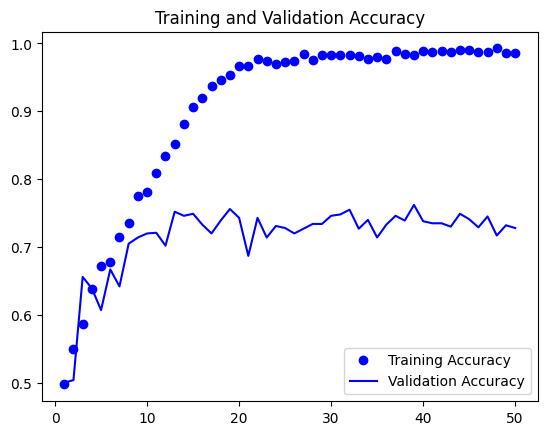

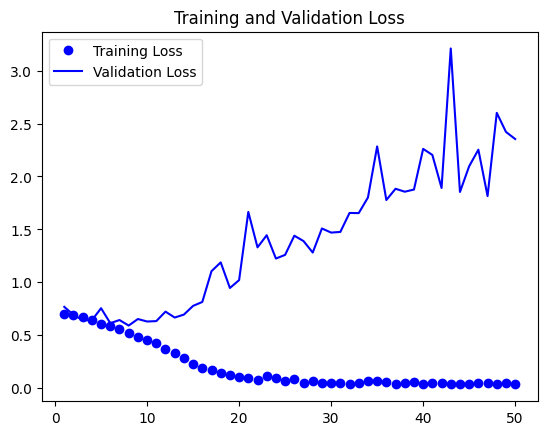

In [39]:
acc = history2.history["accuracy"]
val_acc =history2.history["val_accuracy"]

loss = history2.history["loss"]
val_loss = history2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [40]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation1.x")
history_Results = test_model.evaluate(testing_data)
print(f'Loss: {history_Results[0]:.4f}')
print(f'Accuracy: {history_Results[1]:.4f}')

32/32 [==============================] - 17s 520ms/step - loss: 0.6304 - accuracy: 0.6880
Loss: 0.6304
Accuracy: 0.6880


Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

Implementing the Model with Training Sample of 2000, Validation & Test Samples of 1000 each and using VGG16 Architecture.

Applying the VGG16 Convolutional Base

In [44]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3))

In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [46]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(training_data)
val_features, val_labels =  get_features_and_labels(validating_data)
test_features, test_labels =  get_features_and_labels(testing_data)

1/1 [==============================] - 3s 3s/step


In [49]:

train_features.shape


(2000, 4, 4, 512)

VGG- Model-1

In [50]:
inputs = keras.Input(shape=(4,4, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.x",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)


Epoch 1/30
63/63 [==============================] - 4s 45ms/step - loss: 11.4736 - accuracy: 0.9165 - val_loss: 3.2898 - val_accuracy: 0.9610
Epoch 2/30
63/63 [==============================] - 2s 38ms/step - loss: 3.8990 - accuracy: 0.9660 - val_loss: 3.1386 - val_accuracy: 0.9700
Epoch 3/30
63/63 [==============================] - 2s 28ms/step - loss: 2.2570 - accuracy: 0.9795 - val_loss: 14.2463 - val_accuracy: 0.9290
Epoch 4/30
63/63 [==============================] - 2s 26ms/step - loss: 1.6158 - accuracy: 0.9880 - val_loss: 3.7597 - val_accuracy: 0.9690
Epoch 5/30
63/63 [==============================] - 2s 36ms/step - loss: 2.1920 - accuracy: 0.9825 - val_loss: 4.4941 - val_accuracy: 0.9700
Epoch 6/30
63/63 [==============================] - 2s 30ms/step - loss: 0.4718 - accuracy: 0.9935 - val_loss: 3.4361 - val_accuracy: 0.9740
Epoch 7/30
63/63 [==============================] - 2s 27ms/step - loss: 0.5912 - accuracy: 0.9930 - val_loss: 4.6175 - val_accuracy: 0.9640
Epoch 8/30


In [51]:
best_model = keras.models.load_model("vgg_model1.x")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.4f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.4f}')

32/32 [==============================] - 0s 6ms/step - loss: 6.0494 - accuracy: 0.9610
Loss: 6.0494
Accuracy: 0.9610


VGG Model-2 - With Augmented Images

In [52]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False

In [53]:

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [54]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(150, 150, 3))
x_model = data_augmentation(inputs)
x_model = keras.applications.vgg16.preprocess_input(x_model)
x_model = conv_base(x_model)
x_model = layers.Flatten()(x_model)
x_model = layers.Dense(256)(x_model)
x_model = layers.Dropout(0.5)(x_model)

outputs = layers.Dense(1, activation="sigmoid")(x_model)

model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.x",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              training_data,
              epochs= 30,
              validation_data=validating_data,
              callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 792s 13s/step - loss: 14.7645 - accuracy: 0.8770 - val_loss: 3.6190 - val_accuracy: 0.9610
Epoch 2/30
63/63 [==============================] - 777s 12s/step - loss: 6.9947 - accuracy: 0.9345 - val_loss: 7.6809 - val_accuracy: 0.9440
Epoch 3/30
63/63 [==============================] - 778s 12s/step - loss: 7.3768 - accuracy: 0.9310 - val_loss: 3.3960 - val_accuracy: 0.9670
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 3.9891 - accuracy: 0.9525

In [ ]:
best_model = keras.models.load_model("vgg_model2.x")
VGG_Model_2_Results= best_model.evaluate(testing_data)
print(f'Loss: {VGG_Model_2_Results[0]:.4f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.4f}')

Fine Tuning VGG Modle-2

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model2.x",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_2 = model.fit(
                        training_data,
                        epochs=30,
                        validation_data=validating_data,
                        callbacks=callbacks)


Fine tuning the vgg data model on the testing data

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.x")
FineTuned_VGG_Model_2_Results = best_model.evaluate(testing_data)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.4f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.4f}")